Data Ingesiton

Eda of the data

processing of the data

model building

model evalution

#  Data Ingestion
Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [1]:
#importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys


In [2]:
data=pd.read_csv('TSLA.CSV')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
#univariate time series analysis s
stock_data=data[['Date','Close']]

In [5]:
stock_data.head(7)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
5,2019-05-29,37.972000
6,2019-05-30,37.644001


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

C:\Users\Hemant\AppData\Local\Temp\ipykernel_23060\3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data.head(2)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001


In [10]:
stock_data=stock_data.set_index('Date')

In [11]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [12]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [13]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


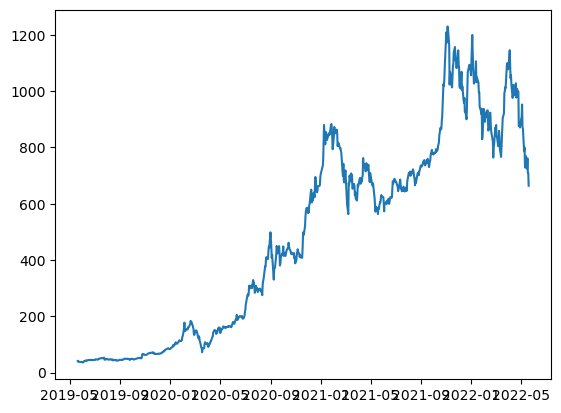

In [14]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

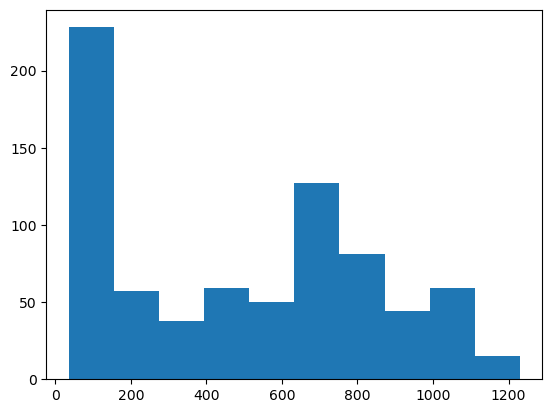

In [15]:
plt.hist(stock_data.Close)

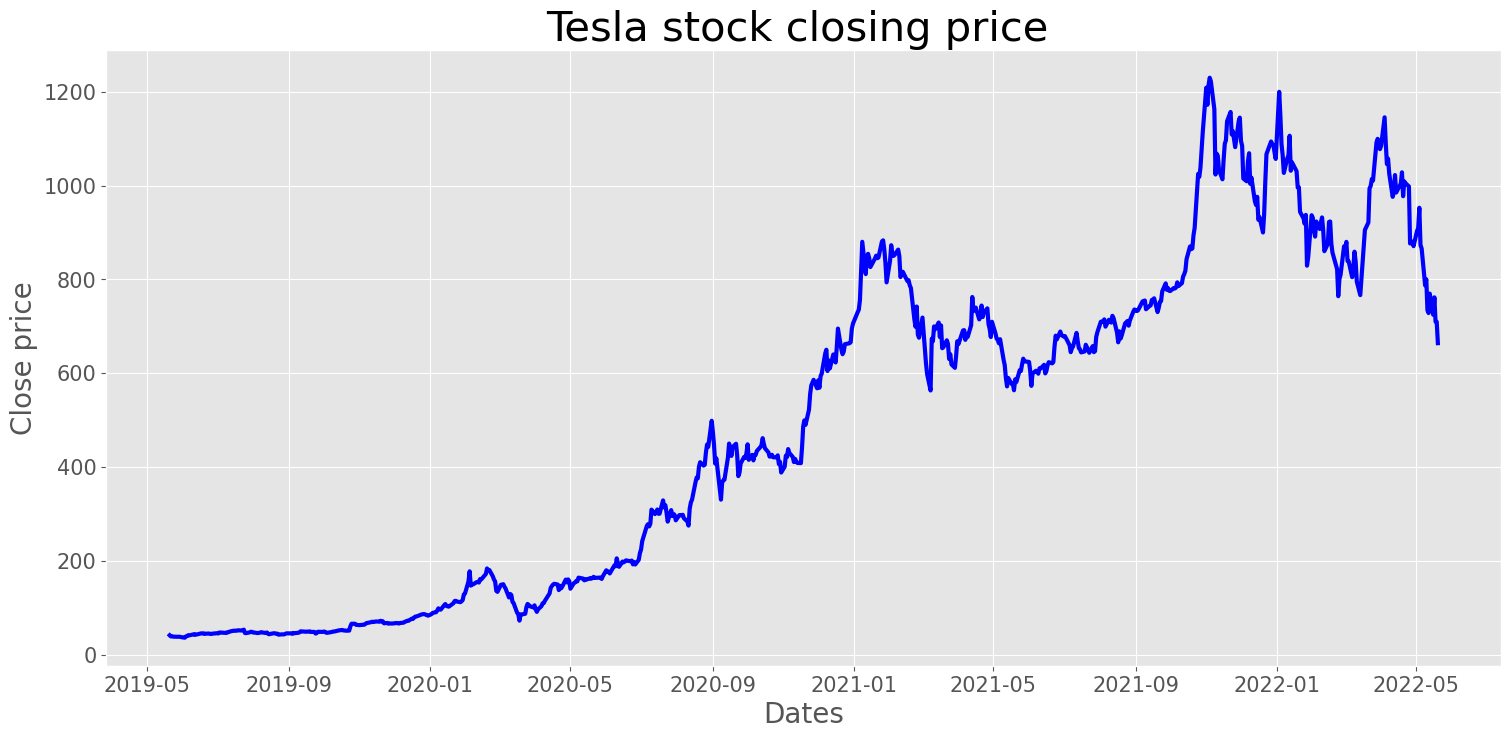

In [16]:
#plotting the close price 
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close price',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')

plt.title('Tesla stock closing price ',fontsize=30)
plt.show()



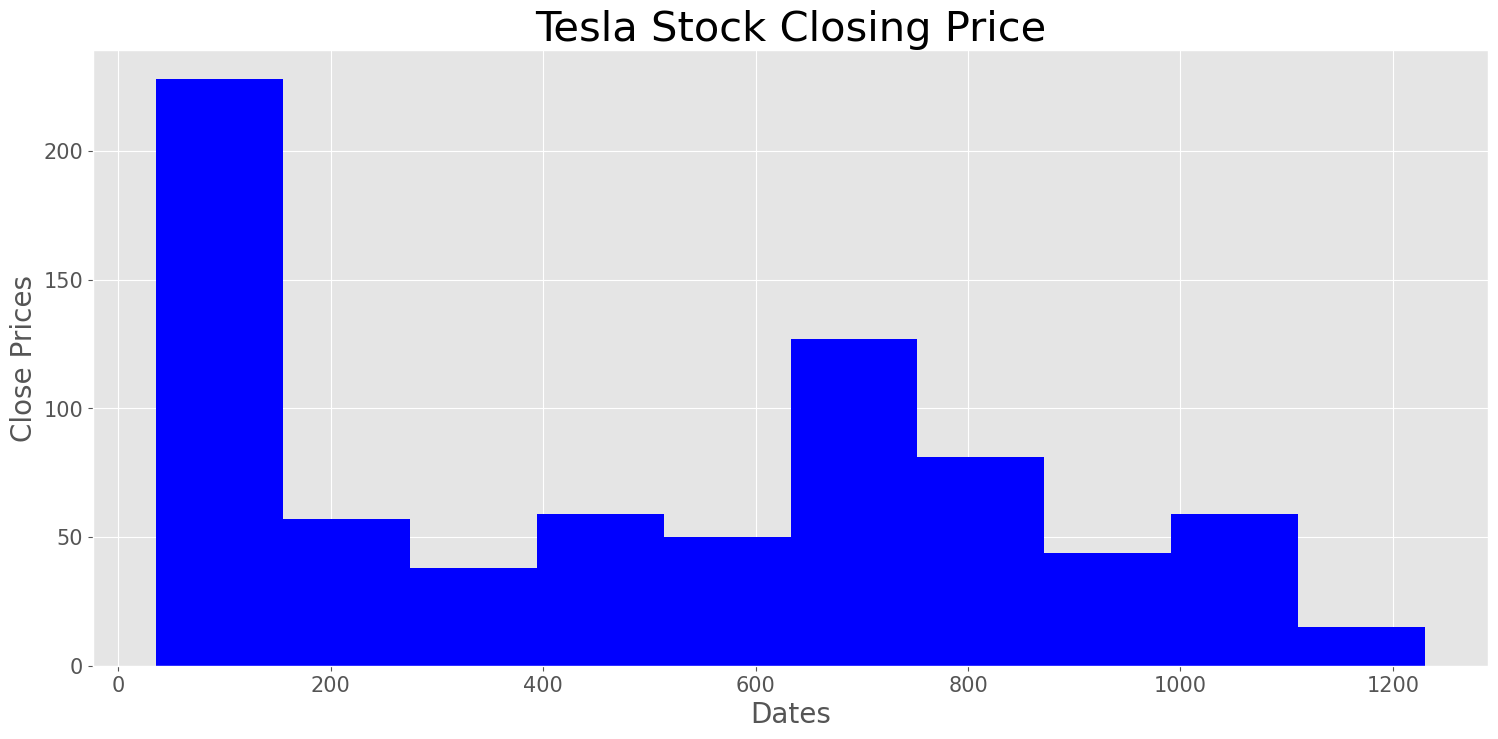

In [17]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

#  visualising the distribution type of the close price

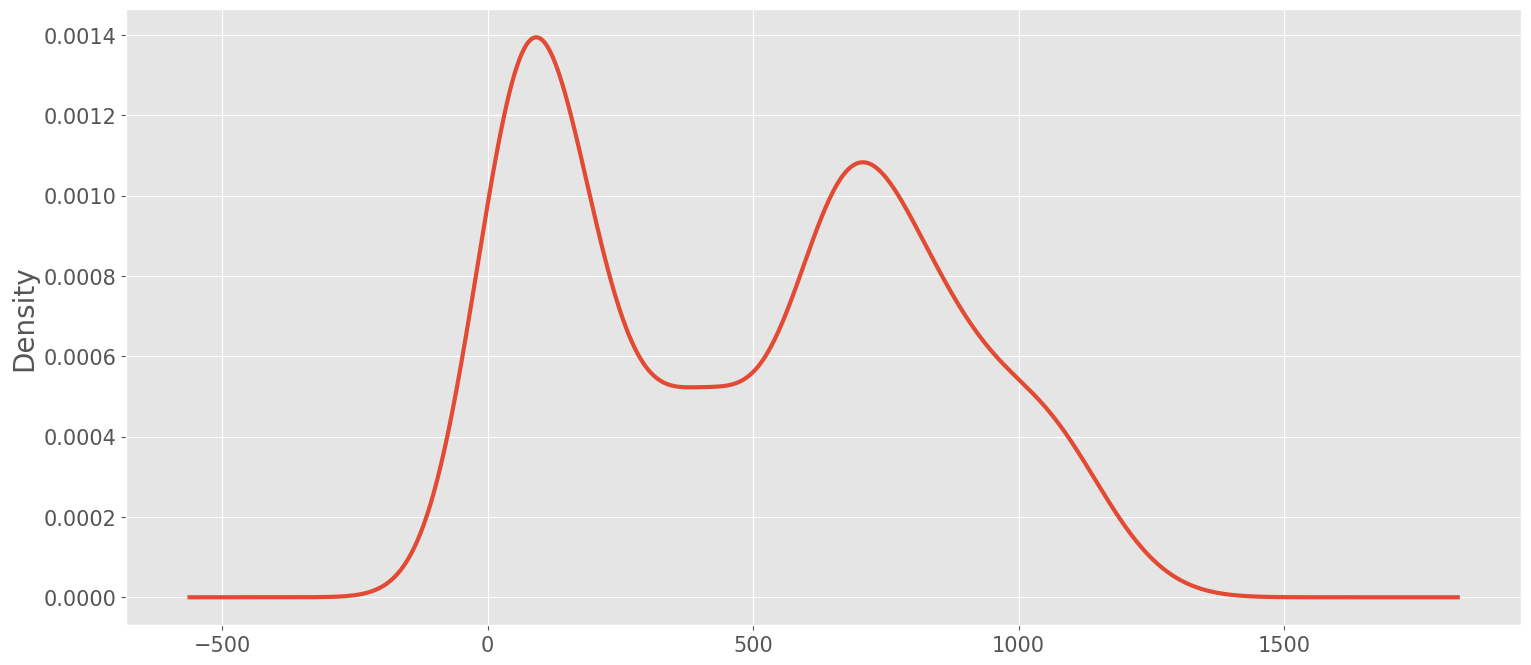

In [18]:
df_close=stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## finding the moving average with the differencing of the values provided 

In [19]:

rolmean=stock_data["Close"].rolling(48).mean()

In [20]:
rolstd=stock_data["Close"].rolling(48).std()

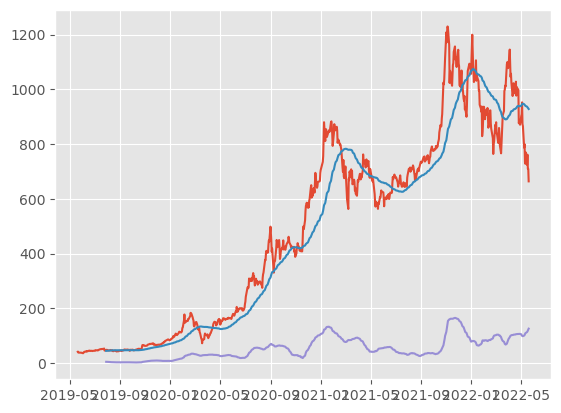

In [21]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

# ada fuller test (ADF)

In [22]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data['Close'])

In [24]:
adft

(-1.363008581703749,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [25]:
pd.Series(adft[0:4],index=['test stats','p value','lag','data points'])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

# test for stationary data if not then convert it 

In [27]:
def test_stationarity(timeseries):
    #determining the rolling statistics 
    rolmean=timeseries.rolling(48).mean()
    rolstd=timeseries.rolling(48).std()
    #plot the rolling statistics 
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean,color='red',label='Rolling mean',linewidth=3)
    plt.plot(rolstd,color='black',label='Rolling std',linewidth=4)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Rolling mean and standard deviation ',fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)

    print('result of dickey fuller test ')
    adft=adfuller(timeseries,autolag='AIC')
    #output for adft will give us withoiut defining which the values are 
    #hence we write manually are what are they what values does it explain using a for loop 
    output=pd.Series(adft[0:4],index=['test statistics','pvalue',' no of lag used ','no of observations used '])
    for key,values in adft[4].items():
        output['critical value (%s)'%key]=values
    print(output)

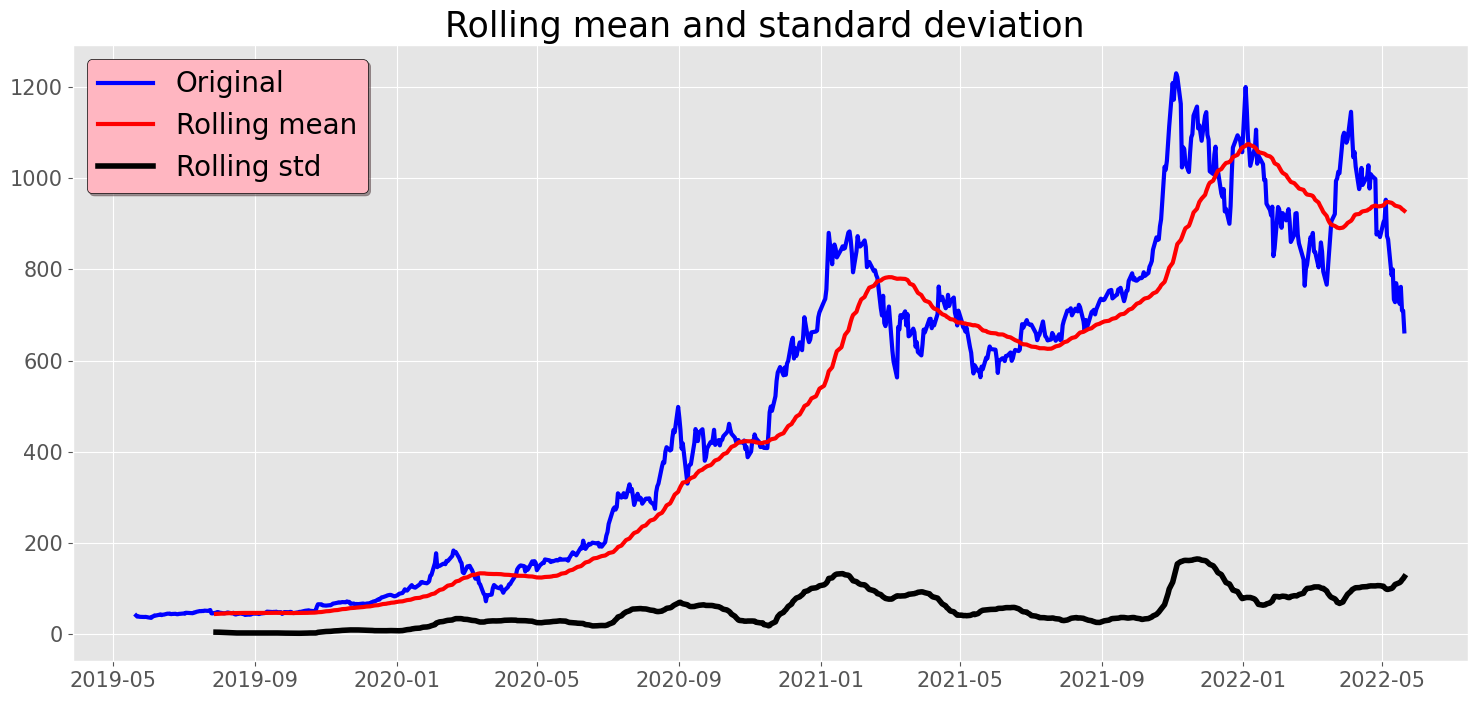

result of dickey fuller test 
test statistics              -1.363009
pvalue                        0.599876
 no of lag used               9.000000
no of observations used     748.000000
critical value (1%)          -3.439123
critical value (5%)          -2.865412
critical value (10%)         -2.568832
dtype: float64


In [28]:
test_stationarity(stock_data.Close)

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[['Close']],period=12)

In [30]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

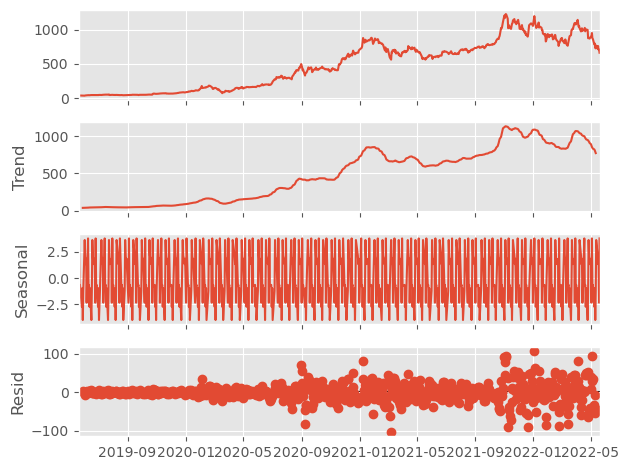

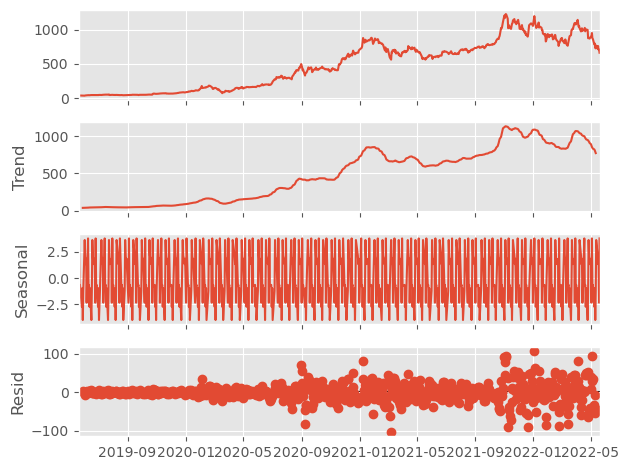

In [31]:
result.plot()
#plots both the additive and multiplicative 

<Figure size 1500x1000 with 0 Axes>

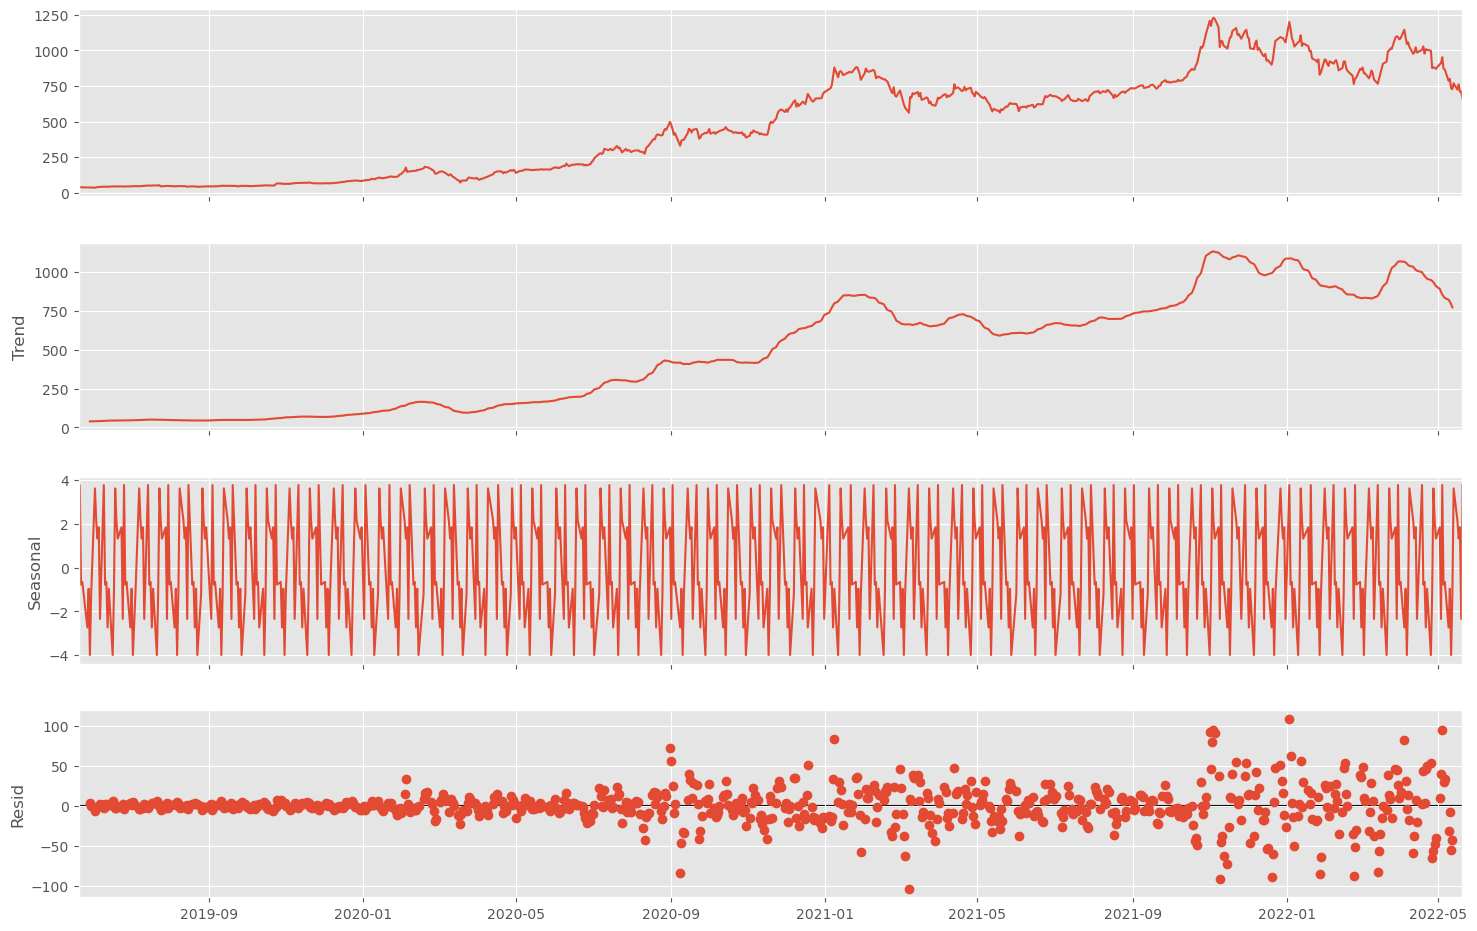

In [32]:
fig=plt.figure(figsize=(15,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [33]:
result1=seasonal_decompose(stock_data[['Close']],period=12,model='multiplicative')

<Figure size 2000x1000 with 0 Axes>

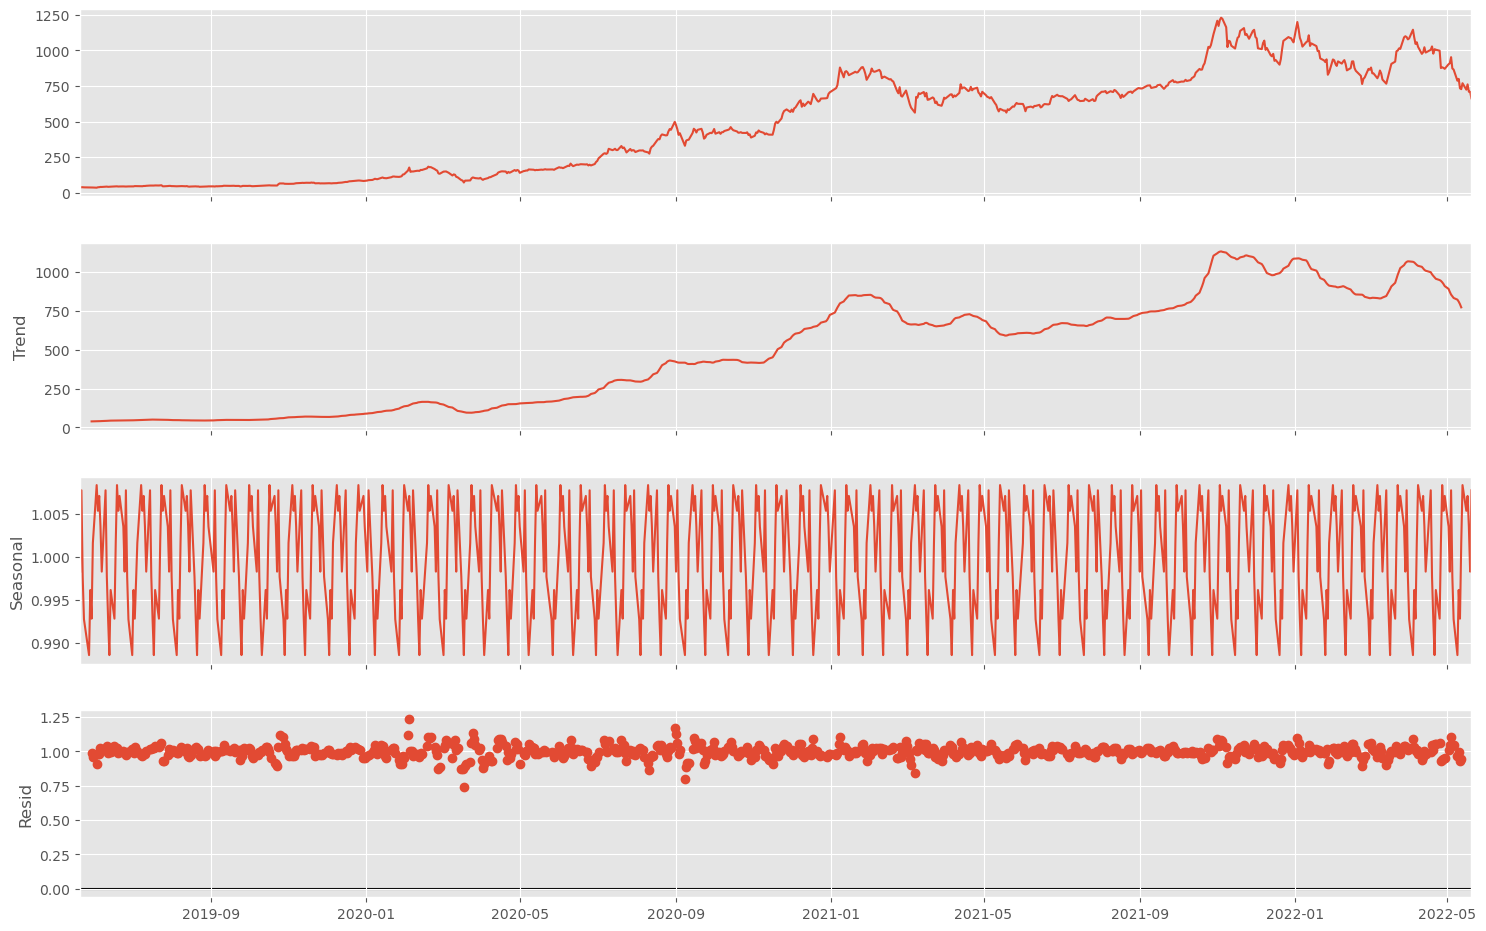

In [34]:
fig=plt.figure(figsize=(20,10))
fig=result1.plot()
fig.set_size_inches(17,10)

C:\Users\Hemant\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

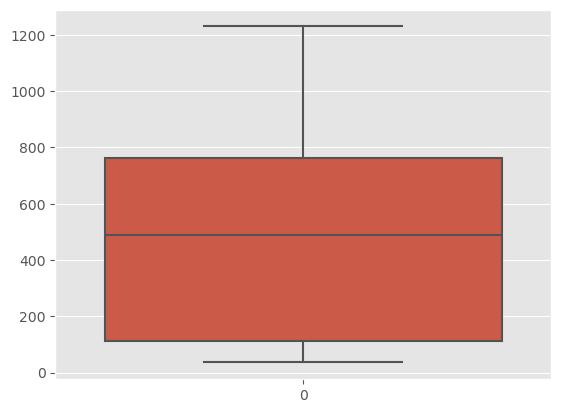

In [35]:
#to check the outliers 
import seaborn as sns 
sns.boxplot(stock_data.Close)

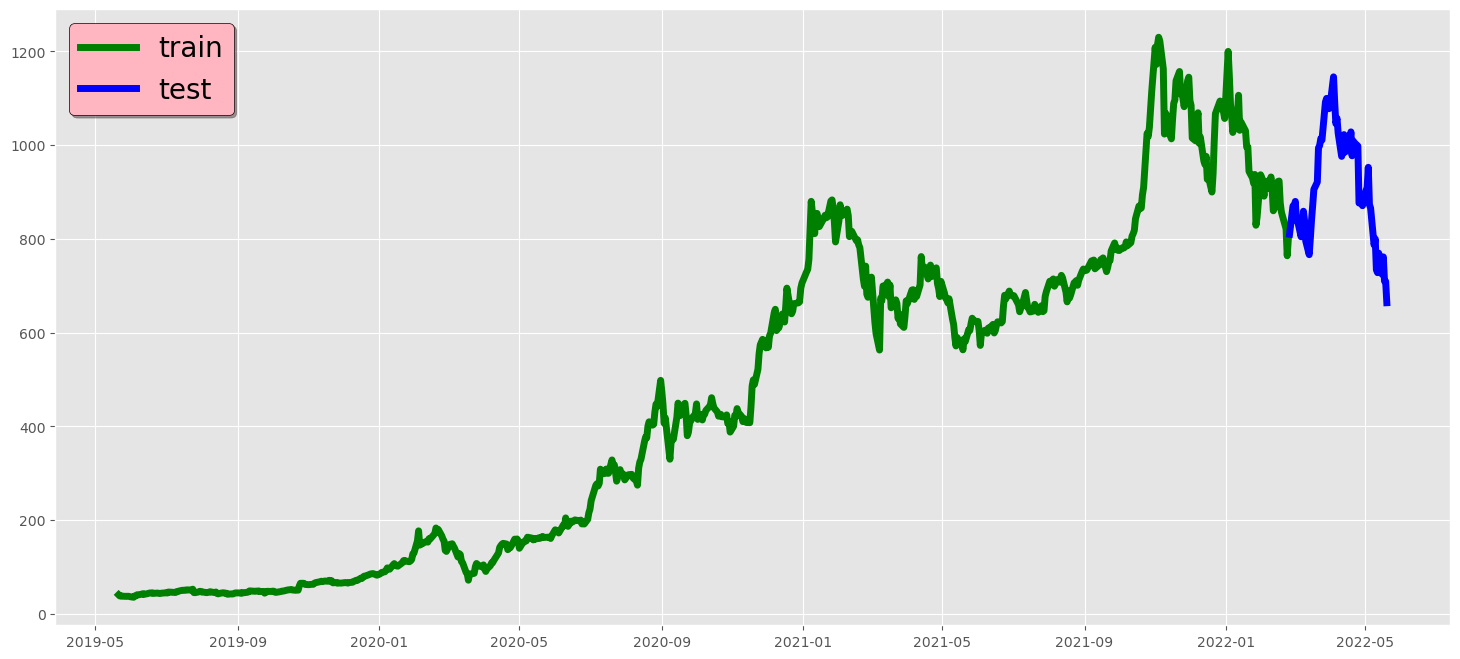

In [37]:
#taing out the train and the test data

train_data=stock_data.Close[0:-60]
test_data=stock_data.Close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(train_data,'green',label='train',linewidth=5)
plt.plot(test_data,'blue',label='test',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')


# building the model 

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
history=[x for x in train_data]

In [42]:
model=ARIMA(history,order=(1,1,1))

In [43]:
model=model.fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sat, 30 Mar 2024   AIC                           6306.700
Time:                        23:34:02   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.589
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model.forecast()[0]

800.2043828204734

In [46]:
test_data[0]

C:\Users\Hemant\AppData\Local\Temp\ipykernel_23060\2395562395.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_data[0]


809.8699951171875

In [47]:
mean_squared_error([test_data[0]],model.forecast())

C:\Users\Hemant\AppData\Local\Temp\ipykernel_23060\3878667994.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]],model.forecast())


93.4240610703914

In [48]:

np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

C:\Users\Hemant\AppData\Local\Temp\ipykernel_23060\1751520910.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]],model.forecast()))


9.66561229671413

In [50]:
def train_arima_model(X,y,arima_order):
    #prepare training dataset 
    #making prediction list 
    history-[x for x in X]
    predictions=list()
    for t in range(len(y)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    #calculate out of the sample error 
    rmse=np.sqrt(mean_squared_error(y,predictions))
    return rmse